### Trabajo Fin de Grado - Laura Pombo Segura

---

*'Predicción de depresión desde síntomas psicológicos y emocionales'*

#### DATASET

Es una base de datos de 39775 personas que han realizado una encuesta para poder medir tres estados emocionales negativos relacionados: depresión, ansiedad y tensión/estrés. DASS-42.

### 1. Ingeniería del dato

Esta primera fase dará comienzo con la limpieza y transformacion sobre la base de datos 'QuestionsDataset.xlsx'. 

---

1.1. Importamos librerías

In [58]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pycountry

1.2. Importamos la base de datos

In [59]:
qst = pd.read_excel("QuestionsDataset.xlsx")
qst

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [60]:
# Visualizamos el nombre de las variables
qst.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

Países en la base de datos a investigar

In [61]:
# Contar número de países únicos en la columna 'country'
num_paises = qst['country'].nunique()
lista_paises = qst['country'].unique()

num_paises, lista_paises

(145,
 array(['IN', 'US', 'PL', 'MY', 'MX', 'GB', 'DE', 'EE', 'CA', 'EC', 'AU',
        'FI', 'ID', 'AE', 'NONE', 'ES', 'NI', 'DO', 'TR', 'NO', 'GR', 'LK',
        'BR', 'AR', 'KH', 'IT', 'MK', 'PT', 'BA', 'RU', 'HU', 'KR', 'IE',
        'RS', 'CZ', 'PH', 'RO', 'FR', 'SG', 'AT', 'UA', 'KW', 'CO', 'GE',
        'SE', 'HK', 'NZ', 'ZA', 'NL', 'DK', 'JM', 'LB', 'CL', 'AW', 'IL',
        'GT', 'PE', 'PK', 'NP', 'HR', 'CR', 'VE', 'BG', 'GH', 'MA', 'PR',
        'SI', 'LV', 'AL', 'VN', 'GU', 'BD', 'TH', 'NG', 'FO', 'UY', 'EG',
        'BE', 'SA', 'SV', 'CH', 'PY', 'SK', 'SY', 'TN', 'TT', 'SR', 'KE',
        'BY', 'PA', 'CY', 'BW', 'MZ', 'BB', 'GG', 'CW', 'IS', 'IR', 'BN',
        'MV', 'OM', 'DZ', 'JP', 'MU', nan, 'IQ', 'BO', 'MD', 'CN', 'LT',
        'BZ', 'BH', 'ME', 'QA', 'TW', 'PS', 'JO', 'SD', 'KY', 'AZ', 'AO',
        'BS', 'GY', 'MO', 'TZ', 'IM', 'AF', 'AM', 'UZ', 'LU', 'ET', 'JE',
        'VU', 'TJ', 'KZ', 'XK', 'HN', 'ZW', 'LA', 'MT', 'SN', 'MN', 'TG',
        'SC', 'RE', 'VC'], dtyp

In [62]:
qst['country'].value_counts()    # Te da el número de entradas

MY    21605
US     8207
GB     1180
CA      978
ID      884
      ...  
UZ        1
AM        1
AF        1
IM        1
VC        1
Name: country, Length: 145, dtype: int64

In [63]:
paises = ['MY', 'US', 'GB', 'CA', 'ID']
filt = qst[qst['country'].isin(paises)]

In [64]:
items = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']
filt['Depressive Total Score'] = filt[items].sum(axis=1)

C:\Users\Laura\AppData\Local\Temp\ipykernel_26024\3054354166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['Depressive Total Score'] = filt[items].sum(axis=1)


In [65]:
# Media de puntuación de depresión por país
media_dep = filt.groupby('country')['Depressive Total Score'].mean()
media_dep

country
CA    36.595092
GB    36.950000
ID    34.919683
MY    34.120389
US    36.060436
Name: Depressive Total Score, dtype: float64

**GRÁFICOS INTERESANTES**

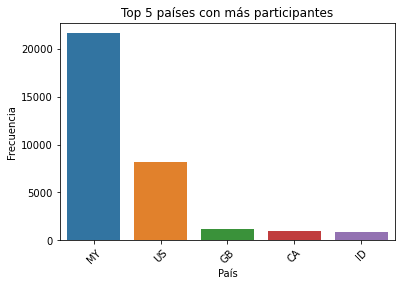

In [66]:
top_paises = qst['country'].value_counts().nlargest(5)
sns.barplot(x=top_paises.index, y=top_paises.values)
plt.title("Top 5 países con más participantes")
plt.xlabel("País")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

1.3. Añadimos columnas adicionales

In [67]:
# Definimos las columnas correspondientes a la subescala de depresión según DASS-42
items = [
    'Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A',
    'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A'
]

# Creamos la columna con la suma de los ítems depresivos
qst['Depressive Total Score'] = qst[items].sum(axis=1)

In [68]:
# Segunda variable que muestra si esa persona tiene depresión o no
depressive_diagnosis = []

num = 20

for score in qst['Depressive Total Score']:
    if score > num:
        depressive_diagnosis.append('YES')
    else:
        depressive_diagnosis.append('NO')
        
qst['Depressive Diagnosis'] = depressive_diagnosis
qst

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,hand,religion,orientation,race,voted,married,familysize,major,Depressive Total Score,Depressive Diagnosis
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,12,1,10,2,1,2,NaN,41,YES
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,7,0,70,2,1,4,NaN,38,YES
2,3,7,5784,1,33,4373,4,41,3242,1,...,1,4,3,60,1,1,3,NaN,53,YES
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,4,5,70,2,1,5,biology,30,YES
4,2,36,3215,2,13,7731,3,5,4156,4,...,3,10,1,10,2,1,4,Psychology,46,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,1,2,4,60,2,1,2,NaN,50,YES
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,10,0,10,2,1,4,Mathematic,52,YES
39772,2,1,25147,1,4,4555,2,14,3388,1,...,1,7,1,30,1,2,3,Computer Science,18,NO
39773,3,36,4286,1,34,2736,2,10,5968,2,...,1,6,1,60,1,1,2,History,30,YES


1.4. Comprobamos si hay valores faltantes 

In [69]:
# Revisamos valores nulos
# Ver cuántos NaNs tiene cada columna
na_counts = qst.isnull().sum()

# Filtrar solo las columnas con al menos un NaN
na_columns = na_counts[na_counts > 0]

# Mostrar ordenadas de mayor a menor
print(na_columns.sort_values(ascending=False))

major      11403
country        2
dtype: int64


Hay valores nulos en la columna 'major' y la columna 'country', pero eso indica que el sujeto no tiene carrera por lo que es relevante. Pero si se va a reemplazar a vacío las respuestas no relevantes o que no se entiendan. Y se va a eliminar las dos filas de country.

In [70]:
# Lista de valores a reemplazar por vacío en la columna 'major'
column_major = [
    '--', '-', '---', '.', '???', '/', '_', 'AA', 'Acc', '18', '19', '75', '12th arts',
    '&#304;lahiyat', '&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1', '&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;',
    '&#28888;&#22521;', '&#22810;&#23186;&#39636;&#35373;&#35336;'
]

# Eliminar filas con NaN en 'country'
qst = qst.dropna(subset=['country'])

# Rellenar NaN en 'major' con string "0"
qst['major'] = qst['major'].fillna("0")

C:\Users\Laura\AppData\Local\Temp\ipykernel_26024\1229227290.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qst['major'] = qst['major'].fillna("0")


In [71]:
# Comprobamos que ha aumentado el número de nulos en la columna major
is_null_major = qst['major'].isnull().sum()
print('Número de nulos en la columna major:', is_null_major)

# Comprobamos que ha aumentado el número de nulos en la columna country
is_null_country = qst['country'].isnull().sum()
print('Número de nulos en la columna country:', is_null_country)

Número de nulos en la columna major: 0
Número de nulos en la columna country: 0


1.5. Comprobamos valores infinitos

In [72]:
# Verificar si hay valores infinitos en el DataFrame
infinite_values = qst.isin([np.inf, -np.inf]).sum().sum()
infinite_values

0

No haría falta eliminar valores infinitos ya que no muestra presencia de ninguno

1.6 Eliminar variables irrelevantes

In [73]:
# Eliminamos columnas específicas innecesarias usando sus nombres exactos
ir=[
    'Q1I', 'Q1E', 'Q2I', 'Q2E', 'Q3I', 'Q3E', 'Q4I', 'Q4E', 'Q5I', 'Q5E',
    'Q6I', 'Q6E', 'Q7I', 'Q7E', 'Q8I', 'Q8E', 'Q9I', 'Q9E', 'Q10I', 'Q10E',
    'Q11I', 'Q11E', 'Q12I', 'Q12E', 'Q13I', 'Q13E', 'Q14I', 'Q14E', 'Q15I', 'Q15E',
    'Q16I', 'Q16E', 'Q17I', 'Q17E', 'Q18I', 'Q18E', 'Q19I', 'Q19E', 'Q20I', 'Q20E',
    'Q21I', 'Q21E', 'Q22I', 'Q22E', 'Q23I', 'Q23E', 'Q24I', 'Q24E', 'Q25I', 'Q25E',
    'Q26I', 'Q26E', 'Q27I', 'Q27E', 'Q28I', 'Q28E', 'Q29I', 'Q29E', 'Q30I', 'Q30E',
    'Q31I', 'Q31E', 'Q32I', 'Q32E', 'Q33I', 'Q33E', 'Q34I', 'Q34E', 'Q35I', 'Q35E',
    'Q36I', 'Q36E', 'Q37I', 'Q37E', 'Q38I', 'Q38E', 'Q39I', 'Q39E', 'Q40I', 'Q40E',
    'Q41I', 'Q41E', 'Q42I', 'Q42E','VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 
    'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 
    'VCL16','introelapse', 'testelapse', 'surveyelapse', 'source', 
    'screensize', 'uniquenetworklocation', 'hand', 'voted', 'engnat'
]

qst.drop(columns=ir, inplace=True)
qst

C:\Users\Laura\AppData\Local\Temp\ipykernel_26024\1081971142.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qst.drop(columns=ir, inplace=True)


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,gender,age,religion,orientation,race,married,familysize,major,Depressive Total Score,Depressive Diagnosis
0,4,4,2,4,4,4,4,4,2,1,...,2,16,12,1,10,1,2,0,41,YES
1,4,1,2,3,4,4,3,4,3,2,...,2,16,7,0,70,1,4,0,38,YES
2,3,1,4,1,4,3,1,3,2,4,...,2,17,4,3,60,1,3,0,53,YES
3,2,3,2,1,3,3,4,2,3,3,...,2,13,4,5,70,1,5,biology,30,YES
4,2,2,3,4,4,2,4,4,4,3,...,2,19,10,1,10,1,4,Psychology,46,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,1,16,2,4,60,1,2,0,50,YES
39771,3,4,3,4,3,4,4,4,3,4,...,1,21,10,0,10,1,4,Mathematic,52,YES
39772,2,1,2,1,1,1,1,1,2,1,...,2,48,7,1,30,2,3,Computer Science,18,NO
39773,3,1,2,2,3,3,3,4,3,1,...,2,20,6,1,60,1,2,History,30,YES


1.7. Ver si existen valores atípicos (outliers)

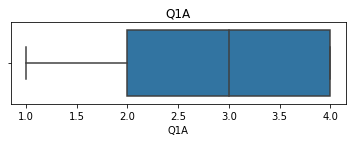

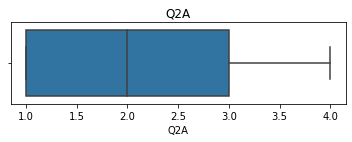

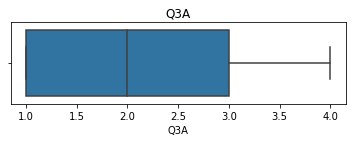

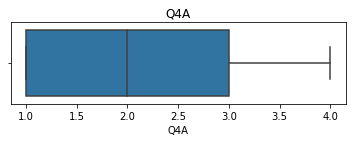

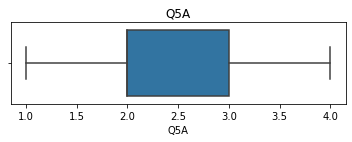

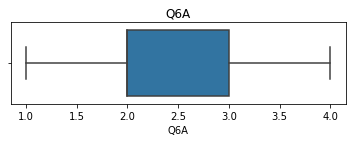

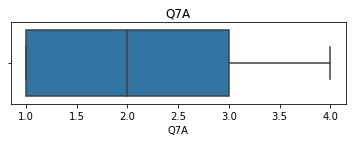

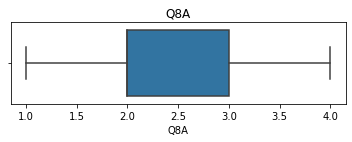

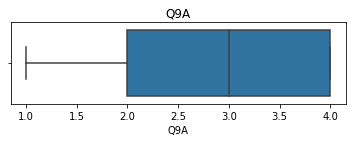

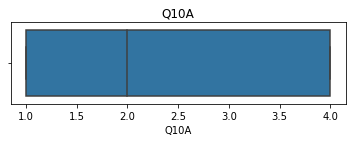

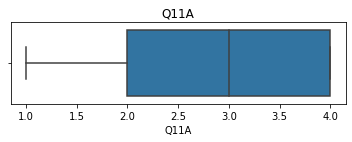

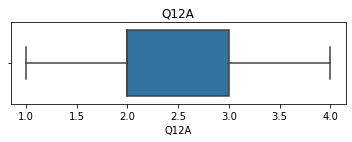

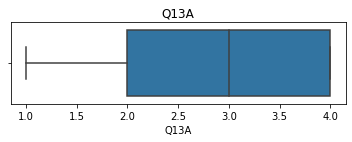

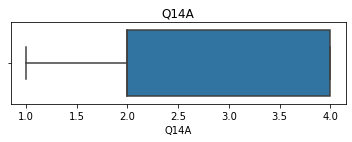

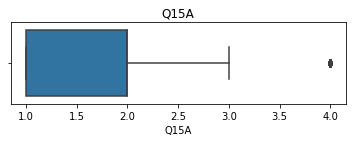

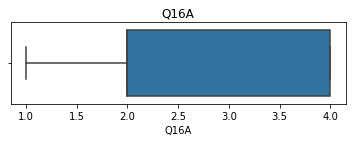

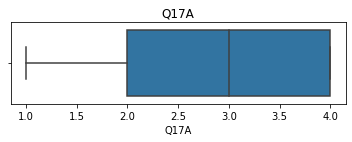

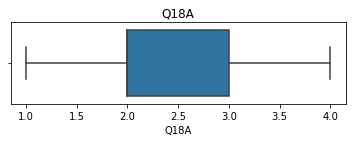

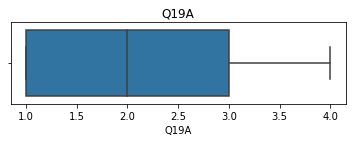

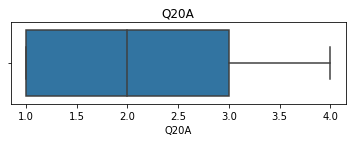

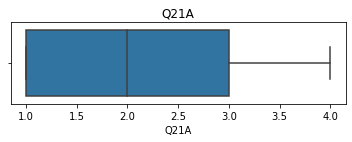

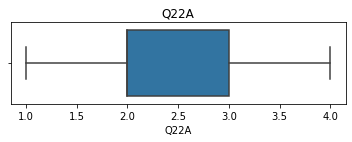

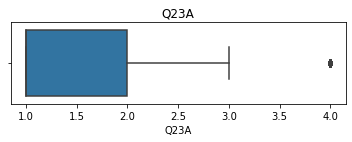

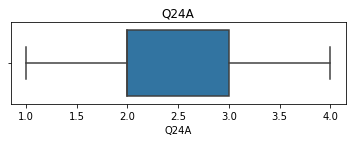

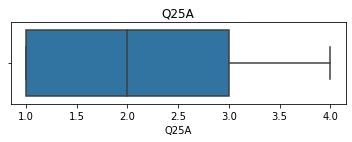

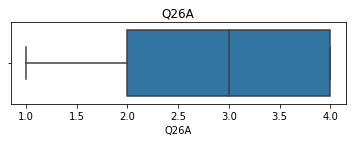

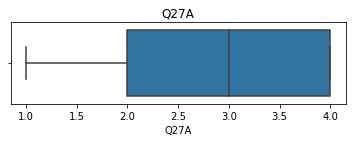

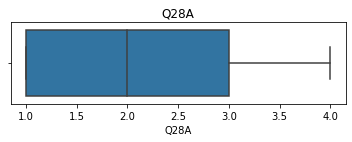

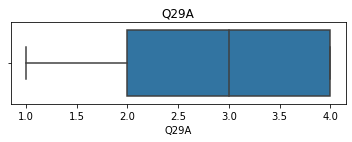

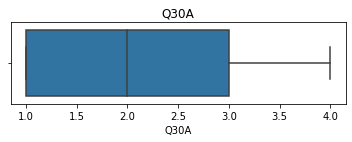

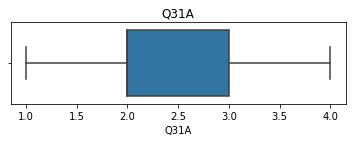

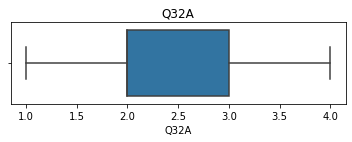

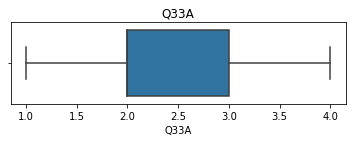

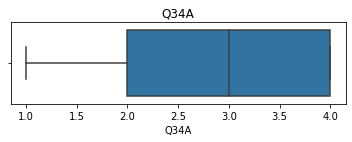

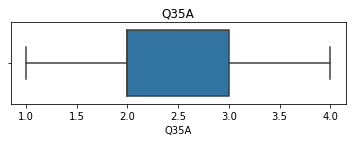

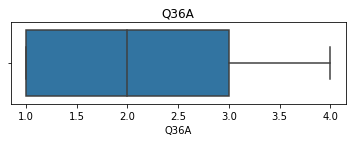

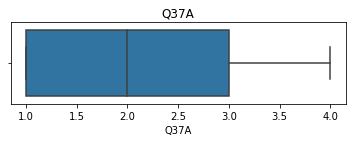

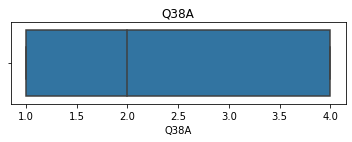

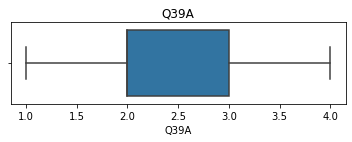

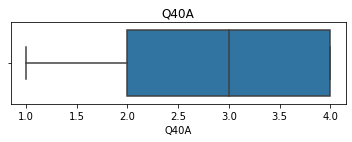

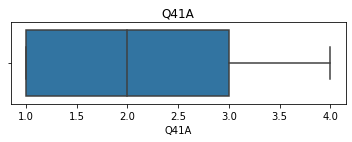

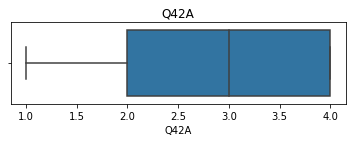

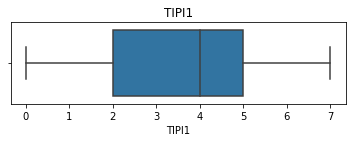

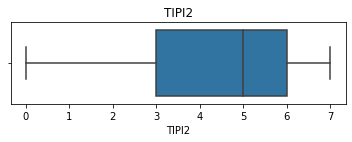

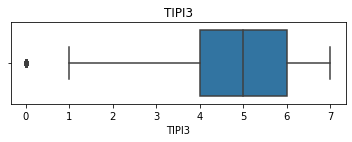

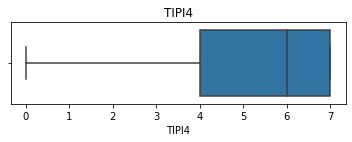

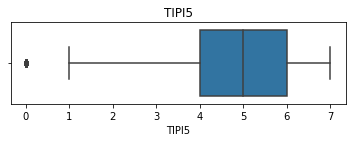

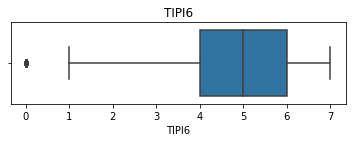

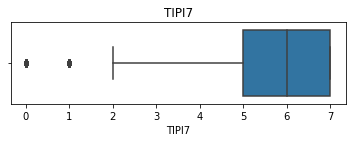

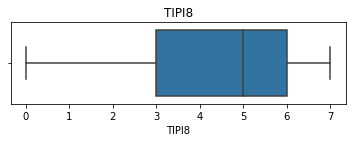

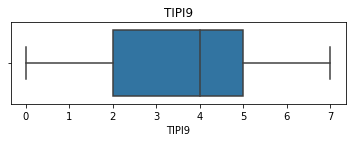

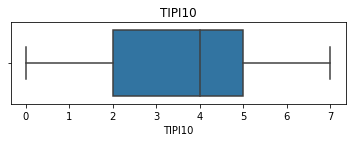

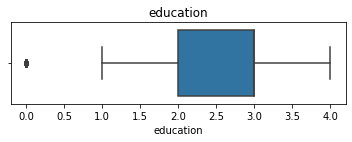

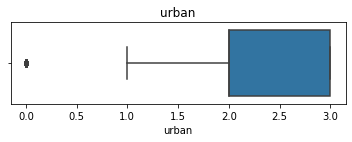

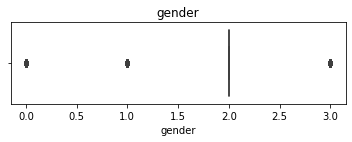

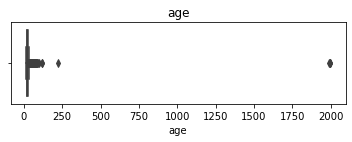

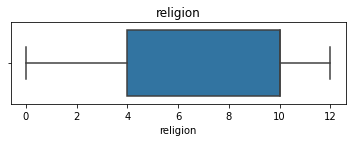

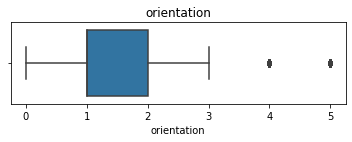

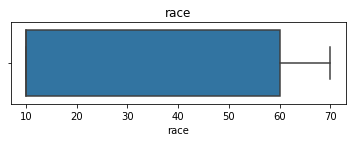

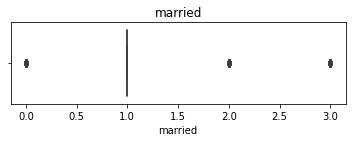

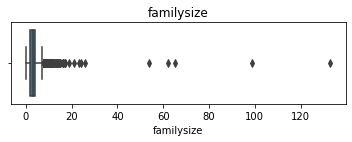

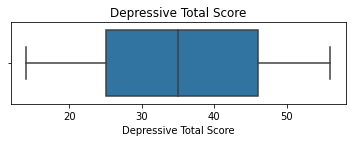

In [74]:
columnas_numericas = qst.select_dtypes(include='number').columns

for col in columnas_numericas:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=qst[col])
    plt.title(col)
    plt.show()

Como la variable género no es continua es mejor usar un gráfico de barras

<AxesSubplot:xlabel='gender', ylabel='count'>

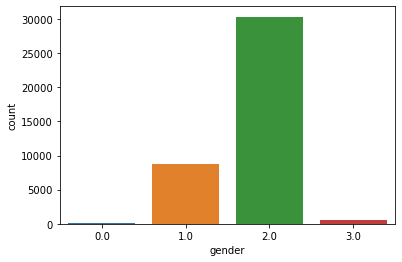

In [43]:
sns.countplot(x='gender', data=qst)

<AxesSubplot:xlabel='married', ylabel='count'>

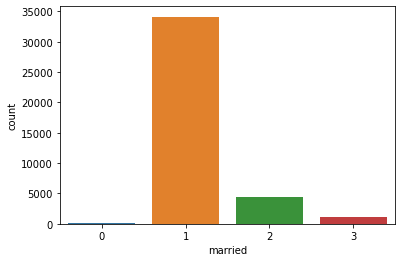

In [287]:
sns.countplot(x='married', data=qst)

In [75]:
qst['age'] = qst['age'].replace({
    1996: 29,
    1998: 27,
    1993: 32,
    1991: 34,
    1999: 26
})

C:\Users\Laura\AppData\Local\Temp\ipykernel_26024\2631025890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qst['age'] = qst['age'].replace({


Se elimina outliers de edad y familysize

In [76]:
# Eliminar filas con edades 223, 117 o 115
qst = qst[~qst['age'].isin([223, 117, 115])]

# Eliminar filas con familysize > 12
qst = qst[qst['familysize'] <= 12]

1.8 Resumen estadístico

Se agrupan las edades para tener mejor visualización

In [77]:
qst['age_group'] = qst['age'].apply(lambda x:
    'Adolescente' if x <= 17 else
    'Joven adulto' if x <= 25 else
    'Adulto joven' if x <= 35 else
    'Adulto medio' if x <= 50 else
    'Adulto mayor' if x <= 60 else
    'Sénior'
)

Se hace una suma de las preguntas de cada subescala, depresión, ansiedad y estrés. 

In [78]:
dass_anx = ['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A',
            'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']
dass_str = ['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A',
            'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']

In [79]:
qst['DASS_Depression'] = qst[items].sum(axis=1)
qst['DASS_Anxiety'] = qst[dass_anx].sum(axis=1)
qst['DASS_Stress'] = qst[dass_str].sum(axis=1)

A continuación las preguntas para el análisis estadístico

In [80]:
# ¿Influye el nivel educativo en los niveles de depresión, ansiedad o estrés?
educ_dass = qst.groupby('education')[['DASS_Depression', 'DASS_Anxiety', 'DASS_Stress']].mean()
print("Educación vs DASS\n", educ_dass, "\n")

Educación vs DASS
            DASS_Depression  DASS_Anxiety  DASS_Stress
education                                            
0                35.322330     29.510680    35.190291
1                38.785222     33.579557    38.404433
2                36.421046     31.219225    36.111274
3                33.707850     28.995031    34.136800
4                32.000400     26.935548    32.698759 



In [81]:
# ¿Se observa una diferencia en síntomas emocionales entre personas de diferentes rangos de edad?
edad_dass = qst.groupby('age_group')[['DASS_Depression', 'DASS_Anxiety', 'DASS_Stress']].mean()
print("Edad vs DASS\n", edad_dass, "\n")

Edad vs DASS
               DASS_Depression  DASS_Anxiety  DASS_Stress
age_group                                               
Adolescente         38.668135     33.939298    38.396284
Adulto joven        32.974751     27.208106    33.426343
Adulto mayor        31.767883     23.116788    29.954745
Adulto medio        31.519054     24.688130    31.984669
Joven adulto        34.998783     30.434760    35.160461
Sénior              29.335968     21.031621    26.616601 



In [82]:
# ¿Qué síntomas son más frecuentes en mujeres y cuáles en hombres?
symptoms_gender = qst.groupby('gender')[['DASS_Depression', 'DASS_Anxiety', 'DASS_Stress']].mean()
print("Síntomas por género\n", symptoms_gender, "\n")

Síntomas por género
         DASS_Depression  DASS_Anxiety  DASS_Stress
gender                                            
0             36.955224     30.253731    35.537313
1             34.264555     27.400706    32.629258
2             35.175763     30.741467    35.810322
3             41.232727     34.483636    39.218182 



In [83]:
# ¿Qué rasgos de personalidad (TIPI) son más comunes en personas con depresión?
tipi_cols = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
tipi_by_diag = qst.groupby('Depressive Diagnosis')[tipi_cols].mean()
print("4. TIPI por diagnóstico depresivo\n", tipi_by_diag, "\n")

4. TIPI por diagnóstico depresivo
                          TIPI1     TIPI2     TIPI3     TIPI4     TIPI5  \
Depressive Diagnosis                                                     
NO                    4.534312  3.676179  5.424447  3.633784  5.559386   
YES                   3.651246  4.285973  4.618801  5.450545  4.821790   

                         TIPI6     TIPI7     TIPI8     TIPI9    TIPI10  
Depressive Diagnosis                                                    
NO                    4.126031  5.415869  3.416034  5.112009  3.288519  
YES                   4.982233  5.248953  4.436521  3.386042  3.810857   



In [84]:
# ¿Las personas que se identifican con una orientación sexual diferente muestran mayores niveles de estrés o ansiedad?
orientation_anx_str = qst.groupby('orientation')[['DASS_Anxiety', 'DASS_Stress']].mean()
print("Orientación sexual vs ansiedad y estrés\n", orientation_anx_str, "\n")

Orientación sexual vs ansiedad y estrés
              DASS_Anxiety  DASS_Stress
orientation                           
0               31.183371    35.273928
1               28.806880    34.242988
2               32.721656    37.864027
3               31.209959    36.143224
4               31.554711    35.770010
5               32.427080    36.610322 



In [85]:
# ¿Influye el estado civil en los niveles de depresión diferenciando por género?
dep_by_married_gender = qst.groupby(['married', 'gender'])['DASS_Depression'].mean().unstack()
print("Estado civil y género vs depresión\n", dep_by_married_gender, "\n")

Estado civil y género vs depresión
 gender           0          1          2          3
married                                            
0        19.000000  35.666667  37.272152        NaN
1        37.174603  34.904030  35.817506  41.459203
2        42.000000  29.785241  30.243045  38.125000
3        31.000000  34.037736  34.025830  31.285714 



In [86]:
# ¿Las personas con una orientación sexual diferente a la heterosexual presentan mayores niveles de depresión, ansiedad o estrés?
orientation_dass = qst.groupby('orientation')[['DASS_Depression', 'DASS_Anxiety', 'DASS_Stress']].mean()
print("Orientación sexual vs DASS completo\n", orientation_dass, "\n")

Orientación sexual vs DASS completo
              DASS_Depression  DASS_Anxiety  DASS_Stress
orientation                                            
0                  34.478569     31.183371    35.273928
1                  34.026398     28.806880    34.242988
2                  38.428914     32.721656    37.864027
3                  36.736140     31.209959    36.143224
4                  36.367781     31.554711    35.770010
5                  36.283271     32.427080    36.610322 



Se van a convertir los datos para el modelo de aprendizaje a float, pero para la variable objetivo posteriormente se quedará en int

1.9. Se convierten los datos a tipo flotante para los modelos y se estandarizan

In [87]:
# Definir columnas a convertir y estandarizar
dass_items = [f'Q{i}A' for i in range(1, 43)]
tipi_items = [f'TIPI{i}' for i in range(1, 11)]
cols_numericas = dass_items + tipi_items + ['age']

# Convertir a float (por si hay strings)
qst[cols_numericas] = qst[cols_numericas].apply(pd.to_numeric, errors='coerce').astype(float)

# Estandarizar
scaler = StandardScaler()
qst[cols_numericas] = scaler.fit_transform(qst[cols_numericas])

1.10. Tipología de los datos

In [88]:
qst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39719 entries, 0 to 39774
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Q1A                     39719 non-null  float64
 1   Q2A                     39719 non-null  float64
 2   Q3A                     39719 non-null  float64
 3   Q4A                     39719 non-null  float64
 4   Q5A                     39719 non-null  float64
 5   Q6A                     39719 non-null  float64
 6   Q7A                     39719 non-null  float64
 7   Q8A                     39719 non-null  float64
 8   Q9A                     39719 non-null  float64
 9   Q10A                    39719 non-null  float64
 10  Q11A                    39719 non-null  float64
 11  Q12A                    39719 non-null  float64
 12  Q13A                    39719 non-null  float64
 13  Q14A                    39719 non-null  float64
 14  Q15A                    39719 non-null

**GRÁFICOS ADICIONALES**

In [89]:
print(qst['Depressive Diagnosis'].value_counts())
print(qst['Depressive Diagnosis'].unique())

YES    33657
NO      6062
Name: Depressive Diagnosis, dtype: int64
['YES' 'NO']


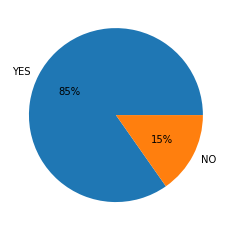

In [90]:
labels = ['YES', 'NO']
plt.pie(qst['Depressive Diagnosis'].value_counts(), labels = labels , autopct = '%0.0f%%')
plt.show()

In [91]:
#Convertimos los datos de la variable dependiente y en valores 0 o 1
qst['Depressive Diagnosis'] = qst['Depressive Diagnosis'].map({'YES': 1, 'NO': 0})
qst

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,race,married,familysize,major,Depressive Total Score,Depressive Diagnosis,age_group,DASS_Depression,DASS_Anxiety,DASS_Stress
0,1.337541,1.644169,-0.217710,1.966982,1.381883,1.390750,2.008622,1.443719,-0.627080,-1.270399,...,10,1,2,0,41,1,Adolescente,41,48,54
1,1.337541,-1.054374,-0.217710,1.007491,1.381883,1.390750,1.040870,1.443719,0.309238,-0.392760,...,70,1,4,0,38,1,Adolescente,38,31,41
2,0.368676,-1.054374,1.707964,-0.911491,1.381883,0.437989,-0.894632,0.493512,-0.627080,1.362518,...,60,1,3,0,53,1,Adolescente,53,26,31
3,-0.600190,0.744654,-0.217710,-0.911491,0.447191,0.437989,2.008622,-0.456694,0.309238,0.484879,...,70,1,5,biology,30,1,Adolescente,30,31,30
4,-0.600190,-0.154860,0.745127,1.966982,1.381883,-0.514773,2.008622,1.443719,1.245557,0.484879,...,10,1,4,Psychology,46,1,Joven adulto,46,54,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,-0.600190,-1.054374,0.745127,0.048000,0.447191,-0.514773,-0.894632,0.493512,-1.563399,1.362518,...,60,1,2,0,50,1,Adolescente,50,26,29
39771,0.368676,1.644169,0.745127,1.966982,0.447191,1.390750,2.008622,1.443719,0.309238,1.362518,...,10,1,4,Mathematic,52,1,Joven adulto,52,48,48
39772,-0.600190,-1.054374,-0.217710,-0.911491,-1.422194,-1.467534,-0.894632,-1.406901,-0.627080,-1.270399,...,30,2,3,Computer Science,18,0,Adulto medio,18,15,19
39773,0.368676,-1.054374,-0.217710,0.048000,0.447191,0.437989,1.040870,1.443719,0.309238,-1.270399,...,60,1,2,History,30,1,Joven adulto,30,27,47


### 2. Análisis del dato

Esta segunda fase de análisis del dato, vamos a emplear tres modelos diferentes: xxxxxxxxxxxxx para poder comparar estos tres modelos utilizados y finalmente poder saber cuál es el más preciso.

Importamos librerías

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score, roc_auc_score

**SEPARAMOS LOS DATOS -- TRAIN | TEST**

In [94]:
nup = ['DASS_Depression', 'DASS_Anxiety', 'DASS_Stress']
qst.drop(columns=nup, inplace=True)

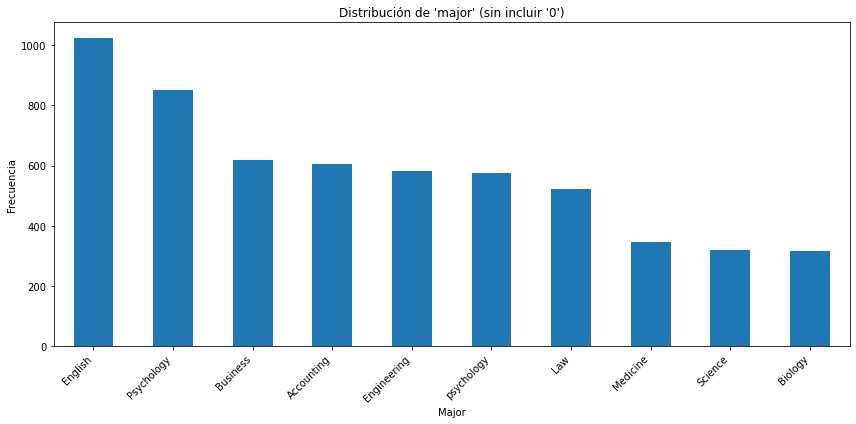

In [95]:
# Contar frecuencias sin incluir el valor "0"
freq_major = qst['major'].value_counts().drop("0").sort_values(ascending=False).head(10)

# Mostrar como gráfico de barras
plt.figure(figsize=(12, 6))
freq_major.plot(kind='bar')
plt.title("Distribución de 'major' (sin incluir '0')")
plt.xlabel("Major")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se elimina la variable 'age_group' ya que solo se quería para visualizar

In [96]:
qst = qst.drop(columns=['age_group'])

*TEXT MINING*

In [97]:
# Limpieza básica
# Convertir a minúsculas y quitar espacios
qst['major'] = qst['major'].str.lower().str.strip()

In [98]:
# Agrupar categorías poco frecuentes
# Contar frecuencia de cada major
top_majors = qst['major'].value_counts().nlargest(20).index

# Reemplazar majors poco comunes por 'other'
qst['major'] = qst['major'].apply(lambda x: x if x in top_majors else 'other')

In [99]:
# Convertir a variable numérica
# Columnas categóricas - One Hot Encoding
var = pd.get_dummies(qst, columns=['country', 'major'], drop_first=True)
var2 = qst.drop(['country', 'major'], axis=1)

# Concatenar las dos variables para obtener el dataset con todas las variables numéricas
qst = pd.concat([var2, var], axis=1)
qst

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,major_finance,major_law,major_management,major_mechanical engineering,major_medical,major_medicine,major_nursing,major_other,major_psychology,major_science
0,1.337541,1.644169,-0.217710,1.966982,1.381883,1.390750,2.008622,1.443719,-0.627080,-1.270399,...,0,0,0,0,0,0,0,0,0,0
1,1.337541,-1.054374,-0.217710,1.007491,1.381883,1.390750,1.040870,1.443719,0.309238,-0.392760,...,0,0,0,0,0,0,0,0,0,0
2,0.368676,-1.054374,1.707964,-0.911491,1.381883,0.437989,-0.894632,0.493512,-0.627080,1.362518,...,0,0,0,0,0,0,0,0,0,0
3,-0.600190,0.744654,-0.217710,-0.911491,0.447191,0.437989,2.008622,-0.456694,0.309238,0.484879,...,0,0,0,0,0,0,0,0,0,0
4,-0.600190,-0.154860,0.745127,1.966982,1.381883,-0.514773,2.008622,1.443719,1.245557,0.484879,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,-0.600190,-1.054374,0.745127,0.048000,0.447191,-0.514773,-0.894632,0.493512,-1.563399,1.362518,...,0,0,0,0,0,0,0,0,0,0
39771,0.368676,1.644169,0.745127,1.966982,0.447191,1.390750,2.008622,1.443719,0.309238,1.362518,...,0,0,0,0,0,0,0,1,0,0
39772,-0.600190,-1.054374,-0.217710,-0.911491,-1.422194,-1.467534,-0.894632,-1.406901,-0.627080,-1.270399,...,0,0,0,0,0,0,0,0,0,0
39773,0.368676,-1.054374,-0.217710,0.048000,0.447191,0.437989,1.040870,1.443719,0.309238,-1.270399,...,0,0,0,0,0,0,0,1,0,0


In [100]:
# Separamos el conjunto de datos en train 80% y test 20%
train, test = train_test_split(qst, test_size = 0.2, shuffle = True)

In [101]:
print('Train data size: ', train.shape)
print('Test data size: ', test.shape)

Train data size:  (31775, 290)
Test data size:  (7944, 290)


In [102]:
print(train.columns.tolist())

['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education', 'urban', 'gender', 'age', 'religion', 'orientation', 'race', 'married', 'familysize', 'Depressive Total Score', 'Depressive Diagnosis', 'Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A', 'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A', 'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'education', '

2.1 Indicamos la variable dependiente

In [103]:
x_train = train.drop(columns='Depressive Diagnosis')
y_train = train['Depressive Diagnosis']
x_test = test.drop(columns='Depressive Diagnosis')
y_test = test['Depressive Diagnosis']

In [104]:
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>


In [105]:
print(train.columns[train.columns.duplicated()])

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'religion', 'orientation',
       'race', 'married', 'familysize', 'Depressive Total Score',
       'Depressive Diagnosis'],
      dtype='object')


In [106]:
# Quitar duplicados de nombre (conservando solo la primera aparición)
train = train.loc[:, ~train.columns.duplicated()]
test = test.loc[:, ~test.columns.duplicated()]

In [107]:
x_train = train.drop(columns='Depressive Diagnosis')
y_train = train['Depressive Diagnosis']
x_test = test.drop(columns='Depressive Diagnosis')
y_test = test['Depressive Diagnosis']

In [108]:
print(y_train.value_counts(), '\n')
print(y_test.value_counts(), '\n')

1    26922
0     4853
Name: Depressive Diagnosis, dtype: int64 

1    6735
0    1209
Name: Depressive Diagnosis, dtype: int64 



In [109]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [114]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [115]:
# Eliminar la columna 'Depressive Total Score' del conjunto de datos por sobreajuste
x_train_without_total = x_train.drop(columns=['Depressive Total Score'])
x_test_without_total = x_test.drop(columns=['Depressive Total Score'])

**Regresión Logística**

In [116]:
from sklearn.linear_model import LogisticRegression
# Regresión Logística
# Creamos el modelo de regresion logistica
lr = LogisticRegression(penalty='l2',  C=0.1,  solver='liblinear',   
                        max_iter=200, random_state=42,
                        fit_intercept=True,  class_weight='balanced',
                        warm_start=False)

# Entrenamos el modelo
lr.fit(x_train_without_total, y_train)

# Predecimos el modelo
y_pred_test_lr = lr.predict(x_test_without_total)

Medidas de error y/o precisión

In [117]:
accuracy_test = accuracy_score(y_test, y_pred_test_lr)
precision_test = precision_score(y_test, y_pred_test_lr)
recall_test = recall_score(y_test, y_pred_test_lr)
f1_test = f1_score(y_test, y_pred_test_lr)
roc_auc_test = roc_auc_score(y_test, y_pred_test_lr)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_lr, y_test))
cm_lr = confusion_matrix(y_test, y_pred_test_lr)

Accuracy: 0.975
Precision: 1.000
Recall: 0.971
F1-score: 0.985
ROC AUC: 0.985
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1405
           1       0.97      1.00      0.99      6539

    accuracy                           0.98      7944
   macro avg       0.98      0.93      0.95      7944
weighted avg       0.98      0.98      0.97      7944



Matriz de confusión

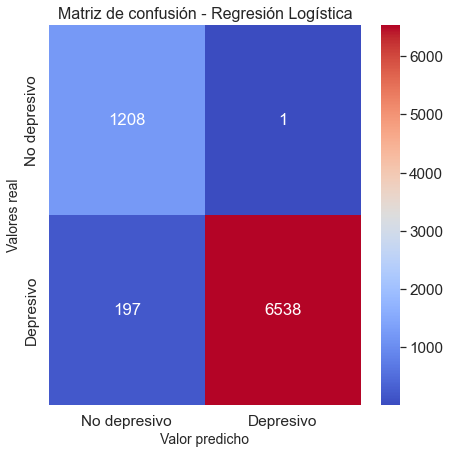

In [118]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_lr, annot=True, cmap='coolwarm', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión - Regresión Logística', fontsize=16)
ax.xaxis.set_ticklabels(['No depresivo', 'Depresivo'])
ax.yaxis.set_ticklabels(['No depresivo', 'Depresivo'])

plt.show()

**Árboles de decisión**

In [133]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# ÁRBOL DE DECISIÓN

# Creamos el arbol de decisión
tree = DecisionTreeClassifier(criterion='entropy',  
                              min_samples_split=20,  min_samples_leaf=10,  
                              random_state=42, class_weight='balanced')

# Entrenamos el modelo
tree.fit(x_train_without_total, y_train)

# Predecimos el modelo
y_pred_test_tree = tree.predict(x_test_without_total)

Medidas de error y/o precisión

In [120]:
accuracy_test = accuracy_score(y_test, y_pred_test_tree)
precision_test = precision_score(y_test, y_pred_test_tree)
recall_test = recall_score(y_test, y_pred_test_tree)
f1_test = f1_score(y_test, y_pred_test_tree)
roc_auc_test = roc_auc_score(y_test, y_pred_test_tree)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_tree, y_test))
cm_tree = confusion_matrix(y_test, y_pred_test_tree)

Accuracy: 0.953
Precision: 0.990
Recall: 0.953
F1-score: 0.971
ROC AUC: 0.951
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1460
           1       0.95      0.99      0.97      6484

    accuracy                           0.95      7944
   macro avg       0.95      0.89      0.92      7944
weighted avg       0.95      0.95      0.95      7944



Matriz de confusión

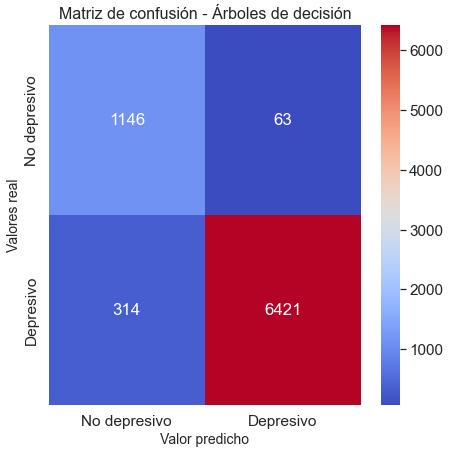

In [121]:
#MATRIZ DE CONFUSIÓN
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_tree, annot=True, cmap='coolwarm', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión - Árboles de decisión', fontsize=16)
ax.xaxis.set_ticklabels(['No depresivo', 'Depresivo'])
ax.yaxis.set_ticklabels(['No depresivo', 'Depresivo'])

plt.show()

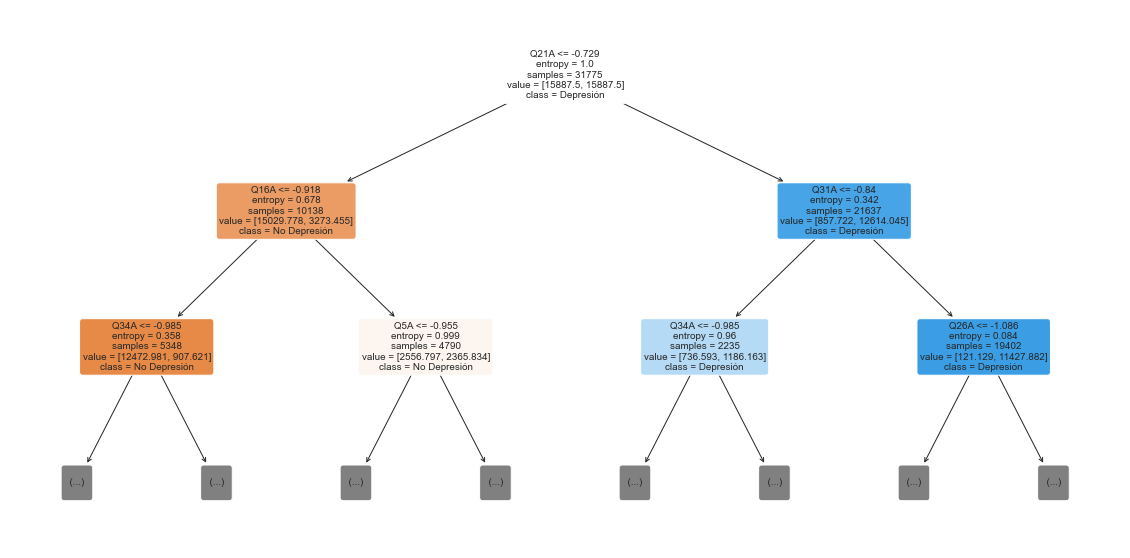

In [138]:
plt.figure(figsize=(20, 10))
plot_tree(tree,
          feature_names=x_train.columns,
          class_names=["No Depresión", "Depresión"],
          filled=True,
          rounded=True,
          max_depth=2)  # Solo muestra hasta 3 niveles
plt.show()

**Random Forest**

In [122]:
from sklearn.ensemble import RandomForestClassifier
# RANDOM FOREST

# Creamos el modelo Random Forest
forest = RandomForestClassifier(n_estimators=300, max_depth=10, 
                                min_samples_split=5, min_samples_leaf=3,
                                max_features='sqrt', class_weight='balanced',
                                random_state=42)

# Entrenamos el modelo
forest.fit(x_train_without_total, y_train)

# Predecimos
y_pred_test_forest = forest.predict(x_test_without_total)

Medidas de error y/o precisión

In [123]:
accuracy_test = accuracy_score(y_test, y_pred_test_forest)
precision_test = precision_score(y_test, y_pred_test_forest)
recall_test = recall_score(y_test, y_pred_test_forest)
f1_test = f1_score(y_test, y_pred_test_forest)
roc_auc_test = roc_auc_score(y_test, y_pred_test_forest)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))

print(classification_report(y_test, y_pred_test_forest))
cm_forest = confusion_matrix(y_test, y_pred_test_forest)

Accuracy: 0.962
Precision: 0.999
Recall: 0.956
F1-score: 0.977
ROC AUC: 0.976
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1209
           1       1.00      0.96      0.98      6735

    accuracy                           0.96      7944
   macro avg       0.90      0.98      0.93      7944
weighted avg       0.97      0.96      0.96      7944



Matriz de confusión

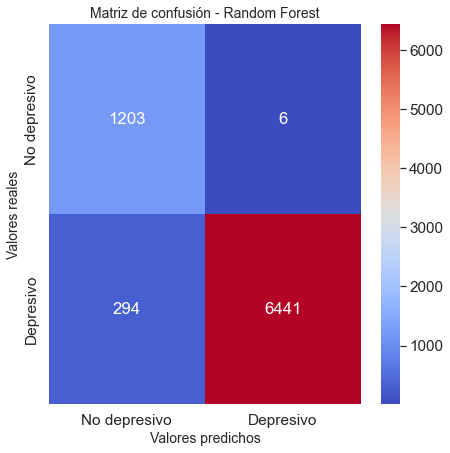

In [124]:
# MATRIZ DE CONFUSIÓN
# Configuramos el estilo de la tabla
sns.set(style="whitegrid", font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm_forest, annot=True, cmap='coolwarm', fmt='g', cbar=True, ax=ax)

# Configuramos los títulos y etiquetas
ax.set_title('Matriz de confusión - Random Forest', fontsize=14)
ax.set_ylabel('Valores reales', fontsize=14)
ax.set_xlabel('Valores predichos', fontsize=14)
ax.xaxis.set_ticklabels(['No depresivo', 'Depresivo'])
ax.yaxis.set_ticklabels(['No depresivo', 'Depresivo'])

plt.show()

#### IMPORTANCIA DE LAS VARIABLES

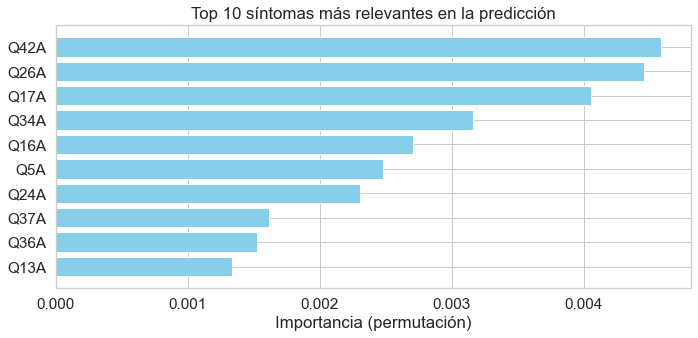

In [128]:
from sklearn.inspection import permutation_importance

# Calcular importancia
perm = permutation_importance(lr, x_test_without_total, y_test, n_repeats=10, random_state=42)

# Crear DataFrame
perm_df = pd.DataFrame({
    'Variable': x_test_without_total.columns,
    'Importancia': perm.importances_mean
})

# Filtrar síntomas (por ejemplo, columnas que empiezan con 'Q')
perm_df = perm_df[perm_df['Variable'].str.startswith('Q')]

# Top 10 síntomas
top_symptoms = perm_df.sort_values(by='Importancia', ascending=False).head(10)

# Visualizar
plt.figure(figsize=(10, 5))
plt.barh(top_symptoms['Variable'], top_symptoms['Importancia'], color='skyblue')
plt.xlabel('Importancia (permutación)')
plt.title('Top 10 síntomas más relevantes en la predicción')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()